In [1]:
from DS_Planck_Unet import *
import numpy as np
from tensorflow.keras.callbacks import ModelCheckpoint
import pickle
from tensorflow import convert_to_tensor

In [29]:
model = unet_planck()

In [30]:
batch_size = 20
min_rad = 2

In [31]:
train_gen = gen_data_from_pregen('/home/rt2122/Data/Planck/train_act/', batch_size)
val_gen = gen_data_from_pregen('/home/rt2122/Data/Planck/val_act/', batch_size)
test_gen = gen_data_from_pregen('/home/rt2122/Data/Planck/test_act/', 1)


(1, 64, 64, 6) (1, 64, 64, 1)


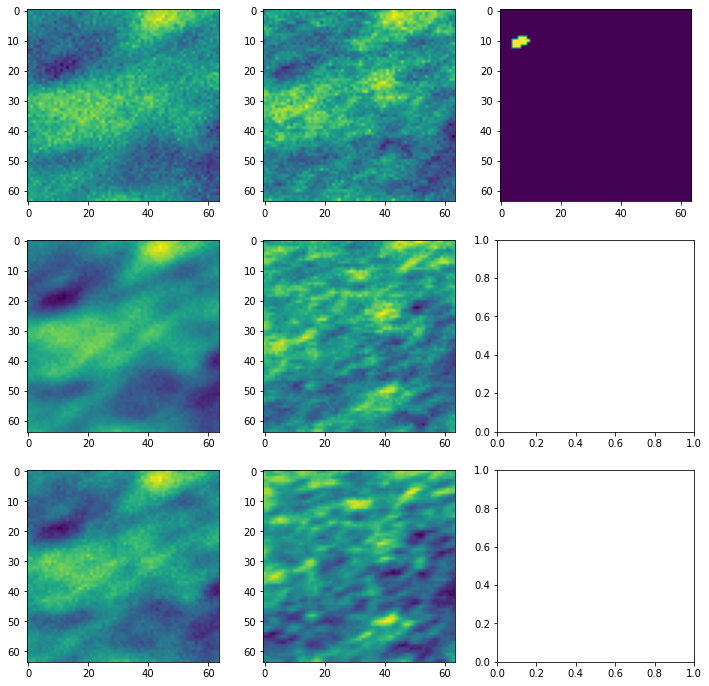

In [32]:
check_gen(test_gen)

In [33]:
filepath='/home/rt2122/Models/act/ep{epoch:04d}-vl{val_loss:.6f}-l{loss:.6f}.hdf5'
checkpoint = ModelCheckpoint(filepath, verbose=1, 
                            save_weights_only=False, save_freq='epoch')
callbacks_list = [checkpoint]

In [ ]:
history = model.fit_generator(generator=train_gen, steps_per_epoch=4800 * 20 // batch_size, 
                              epochs=10, 
                    validation_data=val_gen, validation_steps=600, 
                    callbacks=callbacks_list, initial_epoch=0)

Epoch 1/10
 203/4800 [>.............................] - ETA: 52:48 - loss: nan - accuracy: 0.9666 - iou: nan - dice: nan

In [ ]:
check_gen(val_gen, model)

In [ ]:
history = model.fit_generator(generator=train_gen, steps_per_epoch=4800, epochs=20, 
                    validation_data=val_gen, validation_steps=600, 
                    callbacks=callbacks_list, initial_epoch=10)

In [ ]:
check_gen(test_gen, model)

In [ ]:
with open('/home/rt2122/Models/f8d2.ep7-20.history', 'wb') as f:
    pickle.dump(history.history, f)

In [ ]:
history = model.fit_generator(generator=train_gen, steps_per_epoch=4800, epochs=31, 
                    validation_data=val_gen, validation_steps=40, 
                    callbacks=callbacks_list, initial_epoch=20)

In [ ]:
check_gen(test_gen, model)

In [ ]:
model.save('/home/rt2122/Models/planck_z/f8d2.ep0023.hdf5')

In [ ]:
with open('/home/rt2122/Models/f8d2.ep21-23.history', 'wb') as f:
    pickle.dump(history.history, f)

In [6]:
model = load_planck_model('/home/rt2122/Models/planck_z/f8d2.ep0023.hdf5')

In [7]:
history = model.fit_generator(generator=train_gen, steps_per_epoch=4800, epochs=30, 
                    validation_data=val_gen, validation_steps=40, 
                    callbacks=callbacks_list, initial_epoch=23)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 24/30
4800/4800 [==============================] - ETA: 0s - loss: 0.0032 - accuracy: 0.9987 - iou: 0.5937 - dice: 1.1874
Epoch 00024: val_loss improved from inf to 0.00669, saving model to /home/rt2122/Models/planck_z/f8d2.ep0024-vl0.006689-l0.003243.hdf5
4800/4800 [==============================] - 2505s 522ms/step - loss: 0.0032 - accuracy: 0.9987 - iou: 0.5937 - dice: 1.1874 - val_loss: 0.0067 - val_accuracy: 0.9976 - val_iou: 0.4194 - val_dice: 0.8388
Epoch 25/30
4800/4800 [==============================] - ETA: 0s - loss: 0.0032 - accuracy: 0.9987 - iou: 0.5988 - dice: 1.1976
Epoch 00025: val_loss improved from 0.00669 to 0.00666, saving model to /home/rt2122/Models/planck_z/f8d2.ep0025-vl0.006660-l0.003193.hdf5
4800/4800 [==============================] - 2245s 468ms/step - loss: 0.0032 - accuracy: 0.9987 - iou: 0.5988 - dice: 1.1976 - val_loss: 0.0067 - val_accuracy: 0.9976 - val_iou: 0.4224 - val

(1, 64, 64, 6) (1, 64, 64, 1)


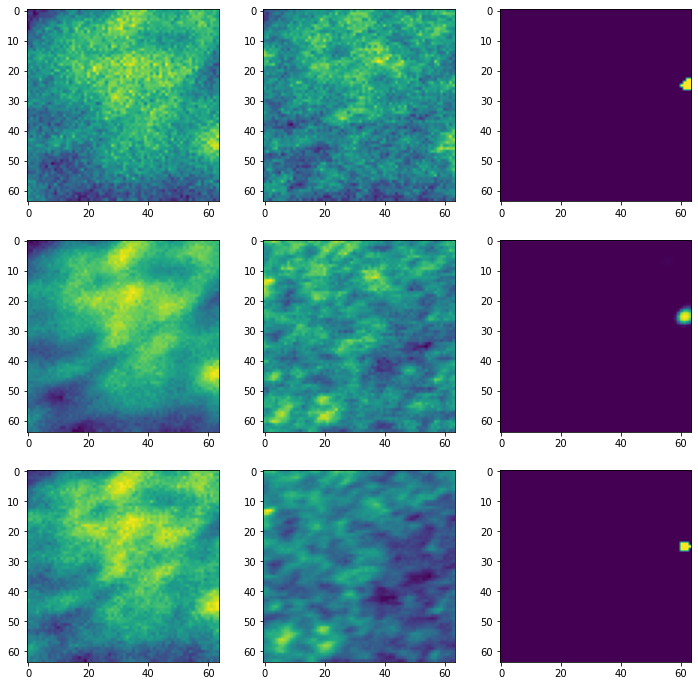

In [8]:
check_gen(test_gen, model)

In [9]:
with open('/home/rt2122/Models/f8d2.ep24-30.history', 'wb') as f:
    pickle.dump(history.history, f)

In [10]:
history = model.fit_generator(generator=train_gen, steps_per_epoch=4800, epochs=40, 
                    validation_data=val_gen, validation_steps=40, 
                    callbacks=callbacks_list, initial_epoch=30)

Epoch 31/40
4800/4800 [==============================] - ETA: 0s - loss: 0.0029 - accuracy: 0.9988 - iou: 0.6251 - dice: 1.2501
Epoch 00031: val_loss did not improve from 0.00617
4800/4800 [==============================] - 2105s 439ms/step - loss: 0.0029 - accuracy: 0.9988 - iou: 0.6251 - dice: 1.2501 - val_loss: 0.0064 - val_accuracy: 0.9977 - val_iou: 0.4474 - val_dice: 0.8948
Epoch 32/40
4800/4800 [==============================] - ETA: 0s - loss: 0.0029 - accuracy: 0.9988 - iou: 0.6284 - dice: 1.2567
Epoch 00032: val_loss did not improve from 0.00617
4800/4800 [==============================] - 2039s 425ms/step - loss: 0.0029 - accuracy: 0.9988 - iou: 0.6284 - dice: 1.2567 - val_loss: 0.0064 - val_accuracy: 0.9976 - val_iou: 0.4270 - val_dice: 0.8539
Epoch 33/40
4800/4800 [==============================] - ETA: 0s - loss: 0.0029 - accuracy: 0.9988 - iou: 0.6322 - dice: 1.2642
Epoch 00033: val_loss did not improve from 0.00617
4800/4800 [==============================] - 2112s 440m

(1, 64, 64, 6) (1, 64, 64, 1)


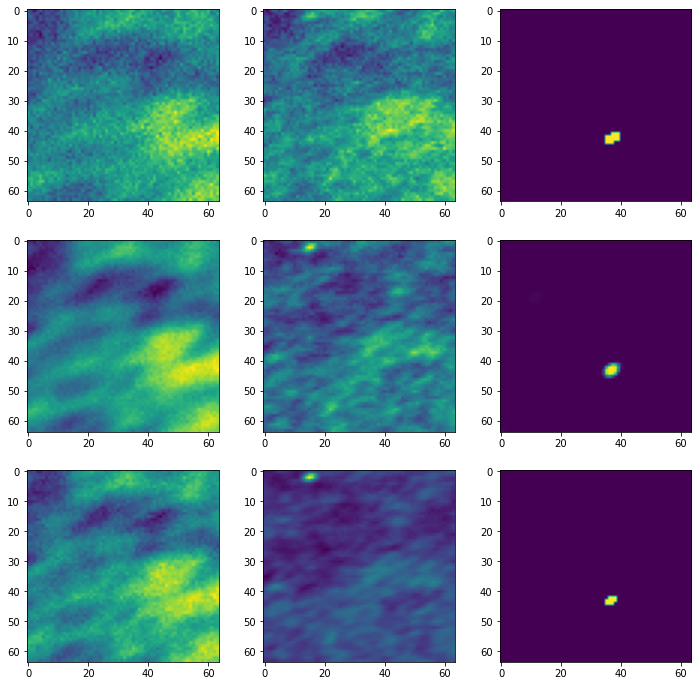

In [11]:
check_gen(test_gen, model)

In [12]:
with open('/home/rt2122/Models/f8d2.ep31-40.history', 'wb') as f:
    pickle.dump(history.history, f)

In [13]:
model.save('/home/rt2122/Models/planck_z/f8d2.ep0030.hdf5')

In [14]:
history.history

{'loss': [0.0029331278055906296,
  0.0028991191647946835,
  0.0028646723367273808,
  0.0028355498798191547,
  0.002799754263833165,
  0.002783626550808549,
  0.0027357335202395916,
  0.0027185354847460985,
  0.002684151753783226,
  0.0026689732912927866],
 'accuracy': [0.9987901449203491,
  0.9988023638725281,
  0.9988197684288025,
  0.9988341927528381,
  0.9988438487052917,
  0.9988518953323364,
  0.9988705515861511,
  0.9988783001899719,
  0.9988945722579956,
  0.9989007711410522],
 'iou': [0.6250943541526794,
  0.6283706426620483,
  0.6321594715118408,
  0.6354243755340576,
  0.6388388872146606,
  0.6408368349075317,
  0.6454786658287048,
  0.6470920443534851,
  0.6507480144500732,
  0.6532454490661621],
 'dice': [1.2501230239868164,
  1.2566719055175781,
  1.2642492055892944,
  1.2707781791687012,
  1.277603268623352,
  1.2815979719161987,
  1.2908825874328613,
  1.2941077947616577,
  1.3014135360717773,
  1.3064073324203491],
 'val_loss': [0.0063918535597622395,
  0.00640620291233